## **NAME:- ANOOP KUMAR MITTAPELLI**
## **SPARK FOUNDATION - DSBA DOMAIN**
## **Prediction using Supervised ML**
## TASK-1:-
##         What will be predicted score if a student studies for 9.25 hrs/day?

## **Importing all libraries required**

In [23]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## **Reading data from the remote link i.e http://bit.ly/w-data**

In [38]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
data.shape     #for how many rows and columns in the data

(25, 2)

In [40]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
data.isnull() #for any null values in the data

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## **Plotting the distribution of scores using matplotlib**

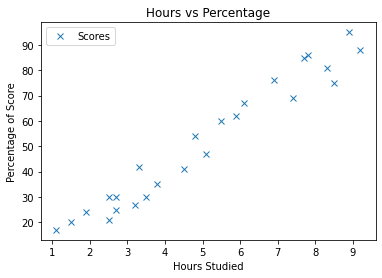

In [42]:
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Score')  
plt.show()

In [43]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

## **Dividing and Training the Algorithm**
We have split our data into training and testing sets

In [44]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Plotting the regression line as Scatter Plot**

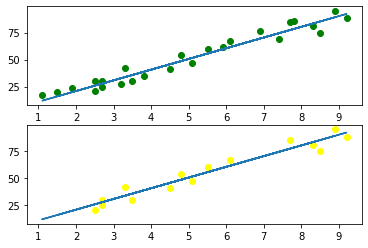

In [46]:
line = reg.coef_*X+reg.intercept_

plt.subplot(2,1,1)
plt.scatter(X, Y,color = 'green')
plt.plot(X, line);

plt.subplot(2,1,2)
plt.scatter(X_train, Y_train,color = 'yellow')
plt.plot(X, line);
plt.show()

### **Prediction The Data**


In [47]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [48]:
Y_pred = reg.predict(X_test) # Predicting the scores gives an array
Y_pred

array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

### **Comparing Actual vs Predicted**

In [49]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


## **Test with my data i.e 9.25hrs**

In [50]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.65537184734602


### **Evaluating the model for mean square error and mean absolute error**



In [51]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 4.8945108634106065
Mean Square Error: 26.034569687682232
